In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
# Load the CSV files again
train_df = pd.read_csv("fraudTrain.csv")
test_df  = pd.read_csv("fraudTest.csv")

# Strip whitespace from column names
train_df.columns = train_df.columns.str.strip()
test_df.columns  = test_df.columns.str.strip()

# Check the columns
print(train_df.columns.tolist())



['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


In [3]:
columns_to_drop = ['Unnamed: 0','trans_date_trans_time','cc_num','first','last',
                   'street','city','state','zip','job','dob','trans_num']

train_df = train_df.drop(columns=[c for c in columns_to_drop if c in train_df.columns])
test_df  = test_df.drop(columns=[c for c in columns_to_drop if c in test_df.columns])

# Check remaining columns
print(train_df.columns.tolist())


['merchant', 'category', 'amt', 'gender', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


In [4]:
# Convert categorical columns to numeric using One-Hot Encoding
train_df = pd.get_dummies(train_df, columns=['category','gender'], drop_first=True)
test_df  = pd.get_dummies(test_df, columns=['category','gender'], drop_first=True)

# Check new columns
print(train_df.columns.tolist())


['merchant', 'amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'category_food_dining', 'category_gas_transport', 'category_grocery_net', 'category_grocery_pos', 'category_health_fitness', 'category_home', 'category_kids_pets', 'category_misc_net', 'category_misc_pos', 'category_personal_care', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'gender_M']


In [5]:


# List of numeric columns to scale
num_cols = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

scaler = StandardScaler()
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
test_df[num_cols]  = scaler.transform(test_df[num_cols])

# Check first 5 rows
print(train_df.head())


                             merchant       amt       lat      long  city_pop  \
0          fraud_Rippin, Kub and Mann -0.407826 -0.484420  0.657620 -0.282589   
1     fraud_Heller, Gutmann and Zieme  0.230039  2.039120 -2.033870 -0.293670   
2                fraud_Lind-Buckridge  0.934149  0.717754 -1.601537 -0.280406   
3  fraud_Kutch, Hermiston and Farrell -0.158132  1.515617 -1.590766 -0.287742   
4                 fraud_Keeling-Crist -0.177094 -0.023035  0.782279 -0.293835   

   unix_time  merch_lat  merch_long  is_fraud  category_food_dining  ...  \
0  -1.858664  -0.494354    0.593864         0                 False  ...   
1  -1.858662   2.078699   -2.030341         0                 False  ...   
2  -1.858662   0.902849   -1.592323         0                 False  ...   
3  -1.858660   1.662886   -1.621848         0                 False  ...   
4  -1.858651   0.026941    0.841909         0                 False  ...   

   category_health_fitness  category_home  category_kids

In [6]:
# Features (X) and target (y)
X_train = train_df.drop(columns=['is_fraud','merchant'])  # drop merchant for now
y_train = train_df['is_fraud']

X_test  = test_df.drop(columns=['is_fraud','merchant'])
y_test  = test_df['is_fraud']

# Check shapes
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1296675, 21) (1296675,)
(555719, 21) (555719,)


In [7]:

model = LogisticRegression(max_iter=1000, class_weight='balanced')  # balanced handles class imbalance

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[523077  30497]
 [   576   1569]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    553574
           1       0.05      0.73      0.09      2145

    accuracy                           0.94    555719
   macro avg       0.52      0.84      0.53    555719
weighted avg       1.00      0.94      0.97    555719



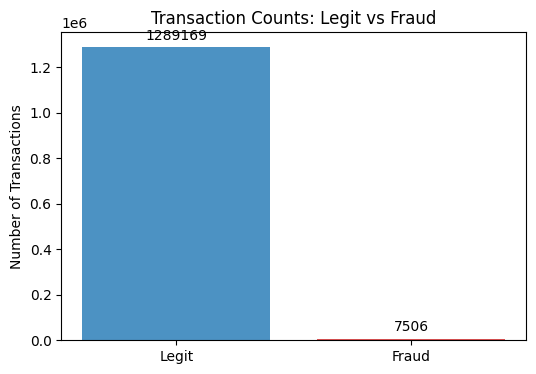

In [8]:
# Bar chart of transaction counts: Legit vs Fraud
counts = train_df['is_fraud'].value_counts().sort_index()  # 0 = legit, 1 = fraud
labels = ['Legit','Fraud']
plt.figure(figsize=(6,4))
bars = plt.bar(labels, counts.values, color=['tab:blue','tab:red'], alpha=0.8)
# Annotate counts on bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(str(int(height)), xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0,3), textcoords="offset points", ha='center', va='bottom')
plt.title('Transaction Counts: Legit vs Fraud')
plt.ylabel('Number of Transactions')
plt.show()


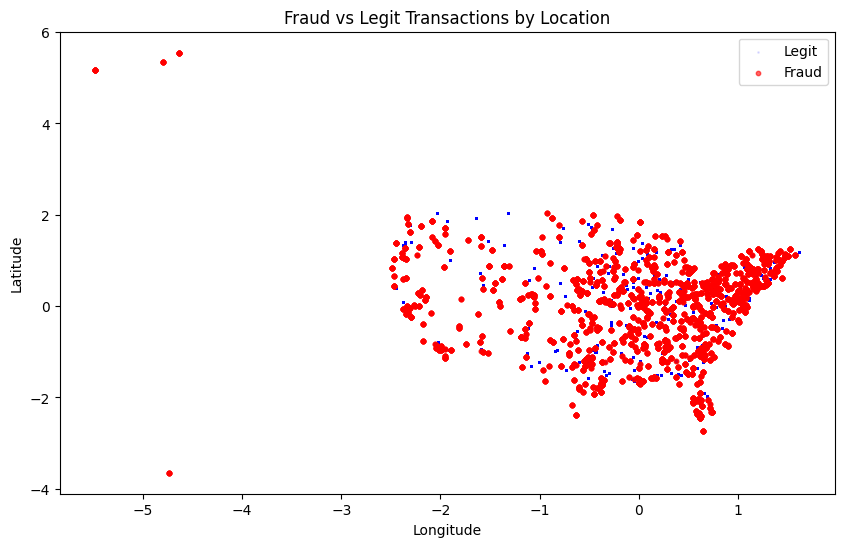

In [9]:
plt.figure(figsize=(10,6))
# Plot legit transactions lightly
plt.scatter(train_df['long'], train_df['lat'], c='blue', s=1, alpha=0.1, label='Legit')
# Plot fraud transactions in red
fraud_df = train_df[train_df['is_fraud']==1]
plt.scatter(fraud_df['long'], fraud_df['lat'], c='red', s=10, alpha=0.6, label='Fraud')

plt.title("Fraud vs Legit Transactions by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()
